<a href="https://colab.research.google.com/github/NameAtirut/AdenosineA2b/blob/main/AdenosineA2bReceptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adenosine A2b Receptor Inhibitor Bioactivity Prediction**
---

Author: [*Atirut Boribalburephan*](https://github.com/NameAtirut)

---


 |

 |



**Inspired by**: [*Data Professor's Youtube Channel*](https://www.youtube.com/channel/UCV8e2g4IWQqK71bbzGDEI4Q) (Chanin Nantasenamat, PhD.)

(End-to-end Acetylcholinesterase Inhibitor Bioactivity project, Stacked Classifier, etc)


## **Create the environment**



**Dependencies**

* Miniconda
* chembl_webresource_client
* rdkit
* numpy
* pandas
* matplotlib
* sklearn
* scipi

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-05-07 09:52:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   123MB/s    in 0.7s    

2021-05-07 09:52:51 (123 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [2]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 1.9 MB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=b5ef77b17c53f7752c55544b667afd9f52f51cb9a9af13015eeb66ed8eb6ac7d
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


## **Import Data from ChemBL database API**

Import Libraries

In [3]:
import numpy as np
import pandas as pd
from chembl_webresource_client.new_client import new_client

### Explore target options

In [4]:
target = new_client.target
#specify target search term
target_query = target.search('Adenosine A2b')
targets = pd.DataFrame.from_dict(target_query)
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P29275', 'xref_name': None, 'xre...",Homo sapiens,Adenosine A2b receptor,28.0,False,CHEMBL255,"[{'accession': 'P29275', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Mus musculus,Adenosine A2b receptor,28.0,False,CHEMBL2237,"[{'accession': 'Q60614', 'component_descriptio...",SINGLE PROTEIN,10090
2,"[{'xref_id': 'P29276', 'xref_name': None, 'xre...",Rattus norvegicus,Adenosine A2b receptor,28.0,False,CHEMBL2592,"[{'accession': 'P29276', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Rattus norvegicus,Adenosine A2 receptor,28.0,False,CHEMBL2094117,"[{'accession': 'P29276', 'component_descriptio...",PROTEIN FAMILY,10116
4,[],Homo sapiens,Adenosine receptors; A2b & A3,28.0,False,CHEMBL2095234,"[{'accession': 'P29275', 'component_descriptio...",SELECTIVITY GROUP,9606


### Select a target

In [5]:
# Homo sapiens Adenosine A2b Receptor
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL255'

In [6]:
# Select only the ones containing IC50 information
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(result)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,38798,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL132806,None,CHEMBL132806,6.72,False,http://www.openphacts.org/units/Nanomolar,261072,=,1,True,=,None,IC50,nM,None,190.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,190.0
1,None,39914,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL336217,None,CHEMBL336217,6.77,False,http://www.openphacts.org/units/Nanomolar,261083,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,170.0
2,None,41120,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL134566,None,CHEMBL134566,6.60,False,http://www.openphacts.org/units/Nanomolar,261074,=,1,True,=,None,IC50,nM,None,250.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,250.0
3,None,41128,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL435022,None,CHEMBL435022,6.82,False,http://www.openphacts.org/units/Nanomolar,261080,=,1,True,=,None,IC50,nM,None,150.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,150.0
4,None,44707,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(COc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL138593,None,CHEMBL138593,6.85,False,http://www.openphacts.org/units/Nanomolar,261078,=,1,True,=,None,IC50,nM,None,140.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,None,19362488,[],CHEMBL4422945,Displacement of [3H]DPCPX from human A2B adeno...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c(C)c(C)sc21,None,None,CHEMBL4422615,Eur J Med Chem,2019,"{'bei': '18.69', 'le': '0.37', 'lle': '3.97', ...",CHEMBL4459477,None,CHEMBL4459477,6.70,False,http://www.openphacts.org/units/Nanomolar,3240574,=,1,True,=,None,IC50,nM,None,200.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nmol/L,UO_0000065,None,200.0
939,None,19362492,[],CHEMBL4422945,Displacement of [3H]DPCPX from human A2B adeno...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCC3,None,None,CHEMBL4422615,Eur J Med Chem,2019,"{'bei': '22.62', 'le': '0.45', 'lle': '5.28', ...",CHEMBL4440686,None,CHEMBL4440686,6.66,False,http://www.openphacts.org/units/Nanomolar,3240575,=,1,True,=,None,IC50,nM,None,2

In [8]:
df.to_csv('adenosine_01_rawdata.csv', index=False)

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,38798,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL132806,None,CHEMBL132806,6.72,False,http://www.openphacts.org/units/Nanomolar,261072,=,1,True,=,None,IC50,nM,None,190.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,190.0
1,None,39914,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL336217,None,CHEMBL336217,6.77,False,http://www.openphacts.org/units/Nanomolar,261083,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,170.0
2,None,41120,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL134566,None,CHEMBL134566,6.60,False,http://www.openphacts.org/units/Nanomolar,261074,=,1,True,=,None,IC50,nM,None,250.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,250.0
3,None,41128,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL435022,None,CHEMBL435022,6.82,False,http://www.openphacts.org/units/Nanomolar,261080,=,1,True,=,None,IC50,nM,None,150.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,150.0
4,None,44707,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(COc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL138593,None,CHEMBL138593,6.85,False,http://www.openphacts.org/units/Nanomolar,261078,=,1,True,=,None,IC50,nM,None,140.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,None,19362488,[],CHEMBL4422945,Displacement of [3H]DPCPX from human A2B adeno...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c(C)c(C)sc21,None,None,CHEMBL4422615,Eur J Med Chem,2019,"{'bei': '18.69', 'le': '0.37', 'lle': '3.97', ...",CHEMBL4459477,None,CHEMBL4459477,6.70,False,http://www.openphacts.org/units/Nanomolar,3240574,=,1,True,=,None,IC50,nM,None,200.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nmol/L,UO_0000065,None,200.0
939,None,19362492,[],CHEMBL4422945,Displacement of [3H]DPCPX from human A2B adeno...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCC3,None,None,CHEMBL4422615,Eur J Med Chem,2019,"{'bei': '22.62', 'le': '0.45', 'lle': '5.28', ...",CHEMBL4440686,None,CHEMBL4440686,6.66,False,http://www.openphacts.org/units/Nanomolar,3240575,=,1,True,=,None,IC50,nM,None,2

In [10]:
len(df2.canonical_smiles.unique())

874

In [11]:
#Drop out duplicates
df2_p = df2.drop_duplicates(['canonical_smiles'])
df2_p

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,38798,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL132806,None,CHEMBL132806,6.72,False,http://www.openphacts.org/units/Nanomolar,261072,=,1,True,=,None,IC50,nM,None,190.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,190.0
1,None,39914,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL336217,None,CHEMBL336217,6.77,False,http://www.openphacts.org/units/Nanomolar,261083,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,170.0
2,None,41120,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL134566,None,CHEMBL134566,6.60,False,http://www.openphacts.org/units/Nanomolar,261074,=,1,True,=,None,IC50,nM,None,250.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,250.0
3,None,41128,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL435022,None,CHEMBL435022,6.82,False,http://www.openphacts.org/units/Nanomolar,261080,=,1,True,=,None,IC50,nM,None,150.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,150.0
4,None,44707,[],CHEMBL639471,Inhibitory activity against NECA stimulated cA...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(COc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c...,None,None,CHEMBL1145112,J. Med. Chem.,2003,None,CHEMBL138593,None,CHEMBL138593,6.85,False,http://www.openphacts.org/units/Nanomolar,261078,=,1,True,=,None,IC50,nM,None,140.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nM,UO_0000065,None,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,None,19362488,[],CHEMBL4422945,Displacement of [3H]DPCPX from human A2B adeno...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c(C)c(C)sc21,None,None,CHEMBL4422615,Eur J Med Chem,2019,"{'bei': '18.69', 'le': '0.37', 'lle': '3.97', ...",CHEMBL4459477,None,CHEMBL4459477,6.70,False,http://www.openphacts.org/units/Nanomolar,3240574,=,1,True,=,None,IC50,nM,None,200.0,CHEMBL255,Homo sapiens,Adenosine A2b receptor,9606,None,None,IC50,nmol/L,UO_0000065,None,200.0
939,None,19362492,[],CHEMBL4422945,Displacement of [3H]DPCPX from human A2B adeno...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCC3,None,None,CHEMBL4422615,Eur J Med Chem,2019,"{'bei': '22.62', 'le': '0.45', 'lle': '5.28', ...",CHEMBL4440686,None,CHEMBL4440686,6.66,False,http://www.openphacts.org/units/Nanomolar,3240575,=,1,True,=,None,IC50,nM,None,2

## **Lipinski's Rule of Five** 
[See the Paper](https://pubmed.ncbi.nlm.nih.gov/11259830/)

### that an orally active drug should follow

- **Molecular Weight (MW)** 

> less than 500 Daltons

- logP (Octanol-water partition coefficient)

> no more than 5

- Number of H+ Donors

> no more than 5 bonds of N-H and O-H

- Number of H+ Acceptors

> no more than 10 atoms of N and O






**Isolate** 

1. ChemBL ID
2. Canonical SMILES
3. Standard IC50 value  




In [12]:
df3 = df2_p[['molecule_chembl_id','canonical_smiles','standard_value']]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL132806,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,190.0
1,CHEMBL336217,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,170.0
2,CHEMBL134566,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,250.0
3,CHEMBL435022,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,150.0
4,CHEMBL138593,O=C(COc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c...,140.0
...,...,...,...
938,CHEMBL4459477,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c(C)c(C)sc21,200.0
939,CHEMBL4440686,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCC3,220.0
940,CHEMBL4516075,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c3c(sc21)CCC3,97.0
941,CHEMBL4453228,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCCC3,390.0


In [13]:
df3.to_csv('adenosine_02_rawfeatures.csv', index=False)

**Defining the Thresholds for Classification of Bioactivity**
1. Active: IC50 <= 1000 nM
2. Intermediate: 1000 nM < IC50 < 10000 nM
3. Inactive: IC50 >= 10000 nM

In [14]:
df4 = pd.read_csv('adenosine_02_rawfeatures.csv')
df4

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL132806,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,190.0
1,CHEMBL336217,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,170.0
2,CHEMBL134566,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,250.0
3,CHEMBL435022,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,150.0
4,CHEMBL138593,O=C(COc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c...,140.0
...,...,...,...
869,CHEMBL4459477,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c(C)c(C)sc21,200.0
870,CHEMBL4440686,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCC3,220.0
871,CHEMBL4516075,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c3c(sc21)CCC3,97.0
872,CHEMBL4453228,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCCC3,390.0


### **Bioclass Categorisation Option 1:** 
Conditional Dataframe Transformation


> Active: [IC50] <= 1000 nM

> Inactive: [IC50] >= 10000 nM

> Intermediate: 1000 nM < [IC50] < 10000 nM





In [15]:
def categorise(value):
    if value <=1000: return 'active'
    elif value>= 10000: return 'inactive'
    else: return 'intermediate'

#transform the column and store in another
df4['bioclass'] = df4['standard_value'].transform(categorise)
print(f"- Bioclasses: {df4.bioclass.unique()}")

- Bioclasses: ['active' 'inactive' 'intermediate']


### **Bioclass Categorisation Option 2:**
Enumerate

In [16]:
# df4['bioclass'] = df4['standard_value']
# for index,value in enumerate(df4['bioclass']):
#   if value <=1000: df4.bioclass[index] = 'active'
#   elif value>= 10000: df4.bioclass[index]= 'inactive'
#   else: df4.bioclass[index] ='intermediate'
# print(f"- Bioclasses: {df4.bioclass.unique()}")

### **Bioclass Categorisation Option 3:**
Dictionary-like Boolean Replacement

In [17]:
# criteria2 = np.stack([(df4['standard_value']<= 1000), (df4['standard_value']>= 10000),(1000 < df4['standard_value']) & (df4['standard_value'] < 10000)], axis=-1)
# conditions = ['active','inactive','intermediate']

# # Duplicate the standard_value column for bioactivity classification
# df4['bioclass'] = df4['standard_value']

# for i in range(len(conditions)):
#   df4['bioclass'] = df4['bioclass'].where(~criteria2[:,i], other = conditions[i])
# print(f"- Bioclasses: {df4.bioclass.unique()}")

### **Lipinski Descriptors**

Features for Drug Evaluation

In [18]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [19]:
# Modified from: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski_desc(smiles):
  #generate molecules from SMILES notation
  molecules = [Chem.MolFromSmiles(mol) for mol in smiles]
  
  #create a blank array
  desc = np.arange(1,1)
  # i has no effect on the loop itself but helps in conditioning
  i=0
  for mol in molecules:        
        #calculate four descriptors for each molecule
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        features = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
        if (i ==0):
          desc = features #the first molecule
        else:
          desc =np.vstack([desc, features]) # vertically stack descriptors
        i +=1
  
  columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]   
  descriptors = pd.DataFrame(data=desc,columns=columnNames)
    
  return descriptors

In [20]:
df_lipinski = lipinski_desc(df4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,429.484,3.96130,1.0,8.0
1,479.544,5.11450,1.0,8.0
2,477.528,4.54800,1.0,8.0
3,445.483,3.79760,1.0,9.0
4,493.527,4.38430,1.0,9.0
...,...,...,...,...
869,358.463,2.73064,0.0,6.0
870,294.376,1.37970,0.0,6.0
871,370.474,2.60250,0.0,6.0
872,308.403,1.76980,0.0,6.0


### Combine 2 dataframes

In [21]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [22]:
df_combined.standard_value.describe()

count       874.000000
mean       9518.729256
std       17695.206193
min           1.000000
25%         103.750000
50%        1000.000000
75%       10000.000000
max      100000.000000
Name: standard_value, dtype: float64

### Logarithmic Transformation of IC50 data



*   Normalising values above 10^8 nM Threshold
*   IC50 -- > pIC50

for a more uniform distribution of values



In [24]:
# inspired by https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input_df):
  ''' calculate pIC50 from IC50 (nM)'''

  def norm_value(input_df):
    ''' normalise values over 10^8 nM (contributing to negative log values) to 10^8 nM'''
    new = input_df.copy()
    cond = (new['standard_value'] > 10**8)
    new['standard_value'] = new['standard_value'].where(~cond, other = 10**8)
    new.rename(columns={'standard_value':'normalised_value'}, inplace=True)
    return new

  new = norm_value(input_df)  
  new['pIC50'] = [-np.log10(nM*(10**-9)) for nM in new['normalised_value']]
  return new

#apply the fn
df_final = pIC50(df_combined)
df_final.normalised_value.describe()

count       874.000000
mean       9518.729256
std       17695.206193
min           1.000000
25%         103.750000
50%        1000.000000
75%       10000.000000
max      100000.000000
Name: normalised_value, dtype: float64

In [25]:
df_final

,molecule_chembl_id,canonical_smiles,normalised_value,bioclass,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL132806,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,190.0,active,429.484,3.96130,1.0,8.0,6.721246
1,CHEMBL336217,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,170.0,active,479.544,5.11450,1.0,8.0,6.769551
2,CHEMBL134566,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,250.0,active,477.528,4.54800,1.0,8.0,6.602060
3,CHEMBL435022,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,150.0,active,445.483,3.79760,1.0,9.0,6.823909
4,CHEMBL138593,O=C(COc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c...,140.0,active,493.527,4.38430,1.0,9.0,6.853872
...,...,...,...,...,...,...,...,...,...
869,CHEMBL4459477,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c(C)c(C)sc21,200.0,active,358.463,2.73064,0.0,6.0,6.698970
870,CHEMBL4440686,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCC3,220.0,active,294.376,1.37970,0.0,6.0,6.657577
871,CHEMBL4516075,COCCn1c(=O)n(CCc2ccccc2)c(=O)c2c3c(sc21)CCC3,97.0,active,370.474,2.60250,0.0,6.0,7.013228
872,CHEMBL4453228,CCn1c(=O)c2c3c(sc2n(CCOC)c1=O)CCCC3,390.0,active,308.403,1.76980,0.0,6.0,6.408935


Frequency plot of classes

Text(0, 0.5, 'Frequency')

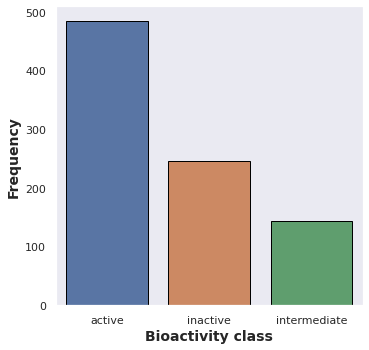

In [26]:
import seaborn as sns
sns.set(style='dark')
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioclass', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

Text(0, 0.5, 'pIC50 value')

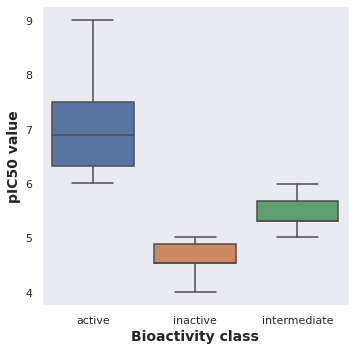

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioclass', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

## **PubChem Molecular Fingerprints**



*   PaDEL Wrapping


In [28]:
# prepare .smi file which contains SMILES and chembl_id
SMILES = ['canonical_smiles', 'molecule_chembl_id']
df_smiles = df_final[SMILES]
df_smiles.to_csv('molecule.smi', sep='\t', index = False, header = False)

### PaDEL Wrapping via Bashing

In [29]:
# https://github.com/dataprofessor/bioinformatics

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2021-05-07 09:56:11--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-05-07 09:56:11--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   158MB/s    in 0.2s    

2021-05-07 09:56:13 (158 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-05-07 09:56:13--  https://github

In [30]:
!cat padel.sh # view the series of bash commands

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [31]:
!bash padel.sh

Processing CHEMBL132806 in molecule.smi (1/874). 
Processing CHEMBL336217 in molecule.smi (2/874). 
Processing CHEMBL134566 in molecule.smi (3/874). Average speed: 4.93 s/mol.
Processing CHEMBL435022 in molecule.smi (4/874). Average speed: 2.83 s/mol.
Processing CHEMBL138593 in molecule.smi (5/874). Average speed: 2.37 s/mol.
Processing CHEMBL335950 in molecule.smi (6/874). Average speed: 1.81 s/mol.
Processing CHEMBL541455 in molecule.smi (7/874). Average speed: 1.69 s/mol.
Processing CHEMBL341777 in molecule.smi (8/874). Average speed: 1.56 s/mol.
Processing CHEMBL135719 in molecule.smi (9/874). Average speed: 1.36 s/mol.
Processing CHEMBL61259 in molecule.smi (10/874). Average speed: 1.32 s/mol.
Processing CHEMBL97748 in molecule.smi (11/874). Average speed: 1.22 s/mol.
Processing CHEMBL317310 in molecule.smi (12/874). Average speed: 1.12 s/mol.
Processing CHEMBL97753 in molecule.smi (13/874). Average speed: 1.08 s/mol.
Processing CHEMBL96041 in molecule.smi (14/874). Average speed:

In [32]:
!ls -l

total 110388
-rw-r--r-- 1 root root   495140 May  7 09:55 adenosine_01_rawdata.csv
-rw-r--r-- 1 root root    63131 May  7 09:56 adenosine_02_rawfeatures.csv
-rw-r--r-- 1 root root  1565002 May  7 09:59 descriptors_output.csv
drwxr-xr-x 3 root root     4096 May  7 09:56 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    57333 May  7 09:56 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 May  7 09:56 padel.sh
-rw-r--r-- 1 root root 25768637 May  7 09:56 padel.zip
drwxr-xr-x 1 root root     4096 Apr 21 13:39 sample_data


## **Prepare the data**

*   X: features
*   Y: labels



In [33]:
df_x = pd.read_csv('descriptors_output.csv')
df_x

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL132806,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336217,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL435022,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL134566,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL138593,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,CHEMBL4459477,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
870,CHEMBL4440686,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
871,CHEMBL4453228,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
872,CHEMBL4516075,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df_y = df_final['pIC50']
df_y

0      6.721246
1      6.769551
2      6.602060
3      6.823909
4      6.853872
         ...   
869    6.698970
870    6.657577
871    7.013228
872    6.408935
873    6.309804
Name: pIC50, Length: 874, dtype: float64

In [35]:
data_full = pd.concat([df_x,df_y], axis =1)
data_full

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL132806,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.721246
1,CHEMBL336217,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.769551
2,CHEMBL435022,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.602060
3,CHEMBL134566,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.823909
4,CHEMBL138593,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.853872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,CHEMBL4459477,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.698970
870,CHEMBL4440686,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.657577
871,CHEMBL4453228,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.013228
872,CHEMBL4516075,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.408935


In [36]:
data_full.to_csv('adenosine_padel.csv')

In [40]:
x = data_full.drop(['Name','pIC50'], axis=1)
y = data_full.pIC50
x.shape

(874, 881)

### Dimensionality Reduction (PCA Analysis)

**Note: Performance-Time Tradeoff** 

This will affect the model's performace but also reduce the time required in the training process.

In [41]:
from sklearn import decomposition
#keep only 100 features with most variance
pca = decomposition.PCA(n_components=100)
pca.fit(x)
x = pca.transform(x)

In [42]:
x.shape

(874, 100)

### **Data Partition (80/20)**

-- Training set

-- Test set

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

## **Build Regressors**


*   Support Vector Regressor (SVR)
 
*   Random Forest Regressor (RF)

*   K-Nearest Regressor (KNN)

*   Multi-layered Perceptron (MLP)




**Metrics for evaluation**

*   R2 score (`r**2`)
*   Mean Squared Error (MSE)

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Support Vector Regressor

In [45]:
from sklearn.svm import SVR

#define the model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr= model.fit(x_train,y_train)

# Make predictions
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

# Training set performance
svr_train_r2 = r2_score(y_train, y_train_pred) 
svr_train_mse = mean_squared_error(y_train, y_train_pred)

# Test set performance
svr_test_r2 = r2_score(y_test, y_test_pred) 
svr_test_mse = mean_squared_error(y_test, y_test_pred) 

print('Model performance for Training set')
print(f"- R2: {svr_train_r2}")
print(f"- MSE: {svr_train_mse}")

print('----------------------------------')
print('Model performance for Test set')
print(f"- R2: {svr_test_r2}")
print(f"- MSE: {svr_test_mse}")

Model performance for Training set
- R2: 0.9831751948817689
- MSE: 0.024103431722151566
----------------------------------
Model performance for Test set
- R2: 0.6618525568449716
- MSE: 0.47100748428072003


K-Nearest Regressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor

#define the model
model = KNeighborsRegressor(5) #default neighbors
knn = model.fit(x_train,y_train)

# Make predictions
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

# Training set performance
knn_train_r2 = r2_score(y_train, y_train_pred) 
knn_train_mse = mean_squared_error(y_train, y_train_pred)

# Test set performance
knn_test_r2 = r2_score(y_test, y_test_pred) 
knn_test_mse = mean_squared_error(y_test, y_test_pred) 

print('Model performance for Training set')
print(f"- R2: {knn_train_r2}")
print(f"- MSE: {knn_train_mse}")

print('----------------------------------')
print('Model performance for Test set')
print(f"- R2: {knn_test_r2}")
print(f"- MSE: {knn_test_mse}")

Model performance for Training set
- R2: 0.8299886561224424
- MSE: 0.24356043296475138
----------------------------------
Model performance for Test set
- R2: 0.6480183646958682
- MSE: 0.4902772086956343


Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

#define the model
model = RandomForestRegressor(n_estimators=100)
rf = model.fit(x_train,y_train)

# Make predictions
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Training set performance
rf_train_r2 = r2_score(y_train, y_train_pred) 
rf_train_mse = mean_squared_error(y_train, y_train_pred)

# Test set performance
rf_test_r2 = r2_score(y_test, y_test_pred) 
rf_test_mse = mean_squared_error(y_test, y_test_pred) 

print('Model performance for Training set')
print(f"- R2: {rf_train_r2}")
print(f"- MSE: {rf_train_mse}")

print('----------------------------------')
print('Model performance for Test set')
print(f"- R2: {rf_test_r2}")
print(f"- MSE: {rf_test_mse}")

Model performance for Training set
- R2: 0.9510380162713552
- MSE: 0.07014356621020762
----------------------------------
Model performance for Test set
- R2: 0.6868700641940513
- MSE: 0.4361604569321732


Multi-Layered Perceptron (Neural Network)

In [48]:
from sklearn.neural_network import MLPRegressor

#define the model
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu",random_state=0, max_iter=2000)
mlp = model.fit(x_train,y_train)

# Make predictions
mlp_train_pred = mlp.predict(x_train)
mlp_test_pred = mlp.predict(x_test)

# Training set performance
mlp_train_r2 = r2_score(y_train, y_train_pred) 
mlp_train_mse = mean_squared_error(y_train, y_train_pred)

# Test set performance
mlp_test_r2 = r2_score(y_test, y_test_pred) 
mlp_test_mse = mean_squared_error(y_test, y_test_pred) 

print('Model performance for Training set')
print(f"- R2: {mlp_train_r2}")
print(f"- MSE: {mlp_train_mse}")

print('----------------------------------')
print('Model performance for Test set')
print(f"- R2: {mlp_test_r2}")
print(f"- MSE: {mlp_test_mse}")

Model performance for Training set
- R2: 0.9510380162713552
- MSE: 0.07014356621020762
----------------------------------
Model performance for Test set
- R2: 0.6868700641940513
- MSE: 0.4361604569321732


## **Build a Stacked Regressor Model**




In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

#define the estimators
estimator_list = [
    ('knn',knn),
    ('svr_rbf',svr),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingRegressor(
    estimators=estimator_list, final_estimator=RidgeCV()
)

# Train stacked model
stack_model.fit(x_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

# Training set model performance
stack_model_train_r2 = r2_score(y_train, y_train_pred) 
stack_model_train_mse = mean_squared_error(y_train, y_train_pred) 

# Test set model performance
stack_model_test_r2 = r2_score(y_test, y_test_pred) 
stack_model_test_mse = mean_squared_error(y_test, y_test_pred) 


print('Model performance for Training set')
print(f"- R2: {stack_model_train_r2}")
print(f"- MSE: {stack_model_train_mse}")

print('----------------------------------')
print('Model performance for Test set')
print(f"- R2: {stack_model_test_r2}")
print(f"- MSE: {stack_model_test_mse}")

Model performance for Training set
- R2: 0.9389151907493444
- MSE: 0.08751088162313443
----------------------------------
Model performance for Test set
- R2: 0.683162747972349
- MSE: 0.4413243986456599


## **Results**

TRAINING set

In [50]:
r2_train_list = {'knn':knn_train_r2,
'svr_rbf': svr_train_r2,
'rf': rf_train_r2,
'mlp': mlp_train_r2,
'stack': stack_model_train_r2}

mse_train_list = {'knn':knn_train_mse,
'svr_rbf': svr_train_mse,
'rf': rf_train_mse,
'mlp': mlp_train_mse,
'stack': stack_model_train_mse}

In [51]:
r2_train = pd.DataFrame.from_dict(r2_train_list, orient='index', columns=['R2_score'])
mse_train = pd.DataFrame.from_dict(mse_train_list, orient='index', columns=['MSE'])

df_train_score = pd.concat([r2_train, mse_train], axis=1)
df_train_score

,R2_score,MSE
knn,0.829989,0.243560
svr_rbf,0.983175,0.024103
rf,0.951038,0.070144
mlp,0.951038,0.070144
stack,0.938915,0.087511


TEST set


In [52]:
r2_test_list = {'knn':knn_test_r2,
'svr_rbf': svr_test_r2,
'rf': rf_test_r2,
'mlp': mlp_test_r2,
'stack': stack_model_test_r2}

mse_test_list = {'knn':knn_test_mse,
'svr_rbf': svr_test_mse,
'rf': rf_test_mse,
'mlp': mlp_test_mse,
'stack': stack_model_test_mse}

In [53]:
r2_test = pd.DataFrame.from_dict(r2_test_list, orient='index', columns=['R2_score'])
mse_test= pd.DataFrame.from_dict(mse_test_list, orient='index', columns=['MSE'])

df_test_score = pd.concat([r2_test, mse_test], axis=1)
df_test_score

,R2_score,MSE
knn,0.648018,0.490277
svr_rbf,0.661853,0.471007
rf,0.686870,0.436160
mlp,0.686870,0.436160
stack,0.683163,0.441324


In [54]:
df_train_score.to_csv('results_train.csv')
df_test_score.to_csv('results_test.csv')

## **Visualisation**

In [55]:
y_pred = stack_model.predict(x)

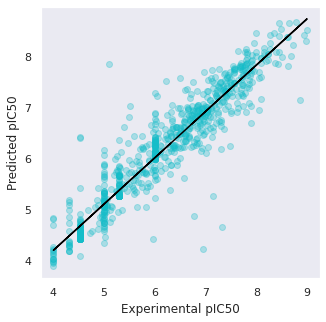

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#14bdc9", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs

z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#000000")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.savefig('Predictions.png')